# Regression Metrics

* Regression is a task when a model attempts to predict continuous values (unlike categorical values, which is classification)
* Here the evaluation metrics like accuracy or recall. Aren’t useful for regression problems, we need metrics designed for continuous values!

For example, attempting to predict the price of a house given its features is a regression task.
Attempting to predict the country a house is in given its features would be a classification task
# Some common evaluation metrics for regression:
1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Square Error
**Mean Absolute Error (MAE)**
This is the mean of the absolute value of errors.
Easy to understand

**Mean Squared Error (MSE)**
This is the mean of the squared errors.
Larger errors are noted more than with MAE, making MSE more popular!

**Root Mean Square Error (RMSE)**
This is the root of the  mean of the squared errors.
Most popular (has same units as y)
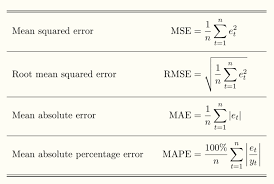
# Most common question from students:
* “Is this value of RMSE good?”
* Context is everything!
A RMSE of $10 is fantastic for predicting the price of a house, but horrible for predicting the price of a candy bar

* Compare your error metric to the average value of the label in your data set to try to get an intuition of its overall performance.
* Domain knowledge also plays an important role here!
* Context of importance is also necessary to consider. 
*We may create a model to predict how much medication to give, in which case small fluctuations in RMSE may actually be very significant!

# Illustration with boston dataset

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston =  load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target )



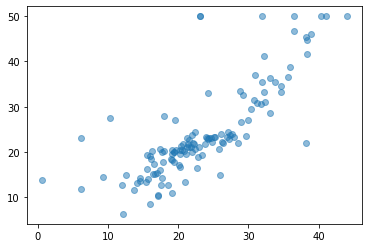

In [13]:
ridge = Ridge().fit(X_train, y_train)
pred = ridge.predict(X_test)
plt.plot(pred, y_test, 'o', alpha =.5)

**What is Ridge REgression ?**
* Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values
* Ridge works by changing the slope of the line(least square regression line)

# Prediction plots
To help check how the data is skewed

Text(0, 0.5, 'true')

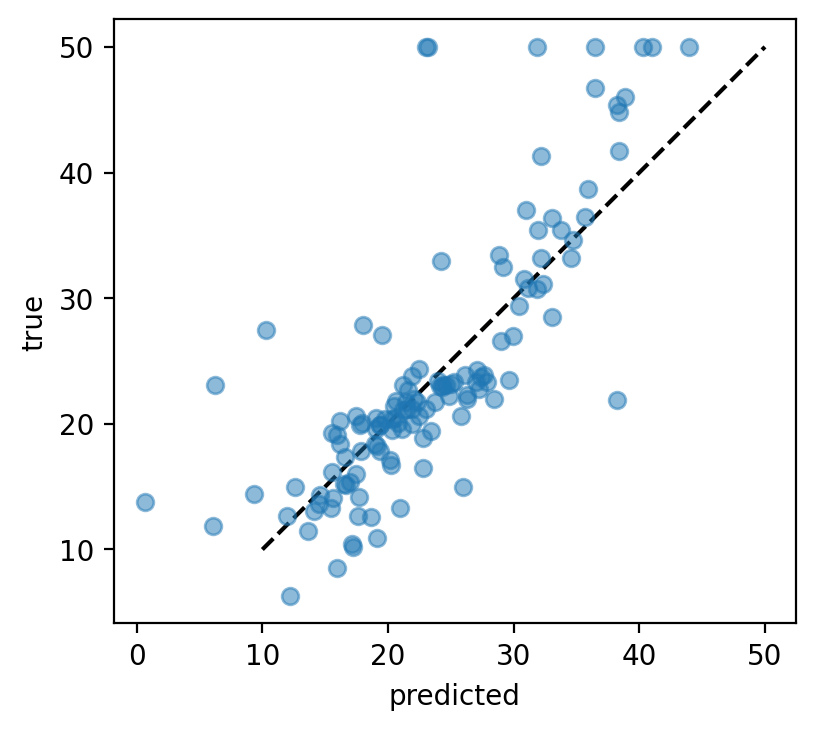

In [14]:
plt.figure(dpi=200)
plt.gca().set_aspect("equal")
plt.plot([10, 50], [10, 50], '--', c='k')
plt.plot(pred, y_test, 'o', alpha=.5)
plt.xlabel("predicted")
plt.ylabel("true")

Text(0, 0.5, 'true - predicted')

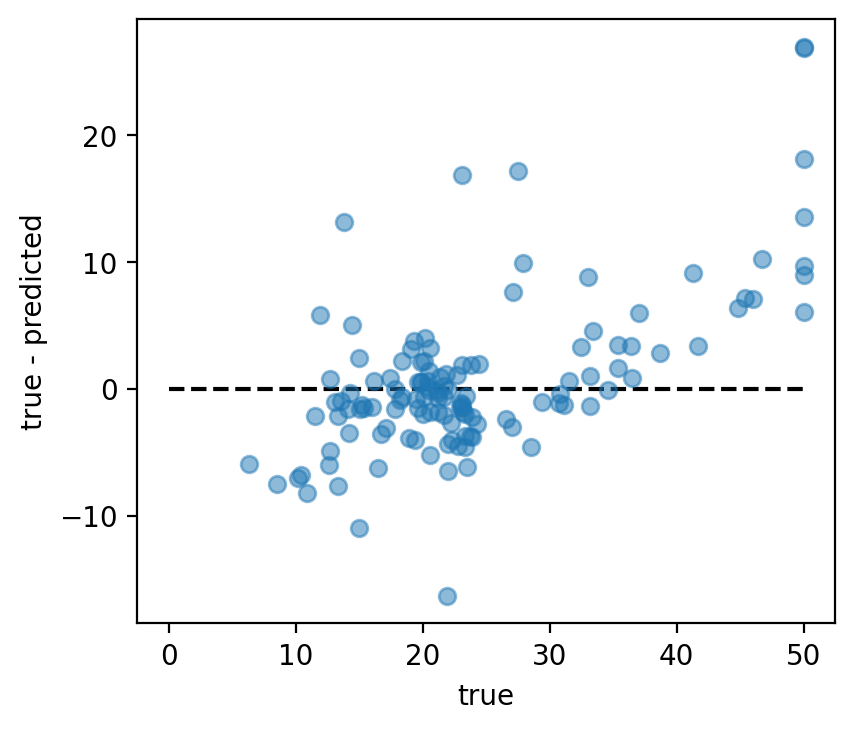

In [15]:
plt.figure(dpi=200)
plt.gca().set_aspect("equal")
plt.plot([0, 50], [0, 0], '--', c='k')
plt.plot(y_test, y_test - pred, 'o', alpha=.5)
plt.xlabel("true")
plt.ylabel("true - predicted")

Here we could see that for smaller values it over predict and for large values it over predicts

# Residual plots

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a nonlinear model is more appropriate.

Text(0, 0.5, 'count')

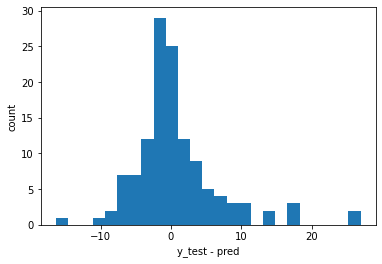

In [23]:
plt.hist(y_test - pred, bins="auto");
plt.xlabel("y_test - pred")
plt.ylabel("count")

# Residual vs Feature
To check if all aspect of the data were caption


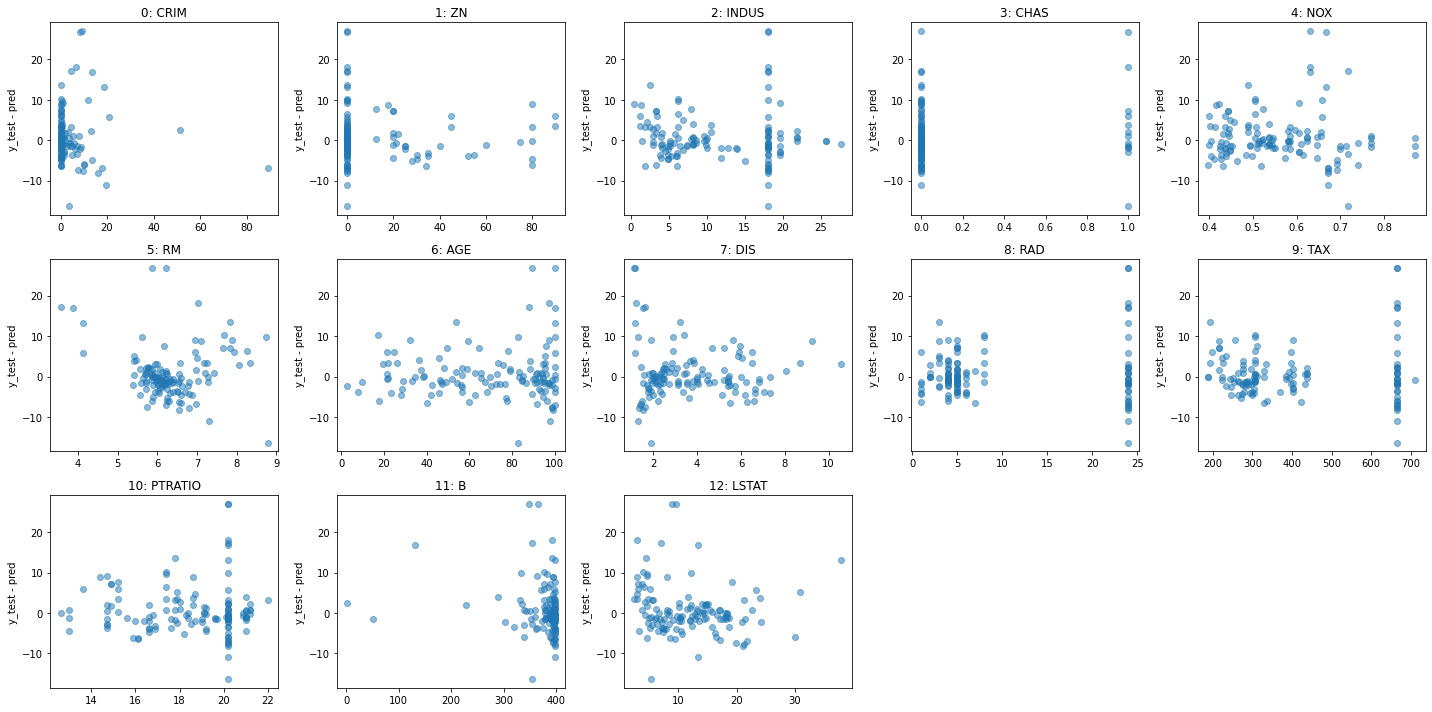

In [24]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X_test[:, i], y_test - pred, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("y_test - pred")
plt.tight_layout()

# Using Metrics in cross-validation

In [28]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [29]:

X, y = make_blobs(n_samples=(2500, 500), cluster_std=[7.0,2])

#default scoring for classification is accuracy
scores_default = cross_val_score(SVC(), X, y)

# providingg scoring = 'accuracy' doesn't change the results
explicit_accuracy = cross_val_score(SVC(), X, y, scoring='accuracy')

#using ROC AUC
roc_auc = cross_val_score(SVC(), X, y, scoring='roc_auc')
print('default scoring:', scores_default)
print('Explicit accuracy scoring:', explicit_accuracy)
print('cross_scoring:', roc_auc)

default scoring: [0.97166667 0.96333333 0.97166667 0.95666667 0.975     ]
Explicit accuracy scoring: [0.97166667 0.96333333 0.97166667 0.95666667 0.975     ]
cross_scoring: [0.9891  0.98832 0.99202 0.98472 0.99272]
